# **Librerias Importadas**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **Analisis información del dataset**

### **Creación del Dataset**

In [3]:

# Ruta al archivo CSV
rentacsv = '/content/drive/MyDrive/Rentabilidad_2016_2021.csv'

# Importar el archivo CSV a un DataFrame
df = pd.read_csv(rentacsv)

# Mostrar las primeras filas del DataFrame
print(df.head())


  FECHA_CORTE  TIPO_ENTIDAD                NOMBRE_TIPO_ENTIDAD  \
0  2016-01-01             5             SF-SOCIEDAD FIDUCIARIA   
1  2016-01-01             5             SF-SOCIEDAD FIDUCIARIA   
2  2016-01-01            85  COMISIONISTAS DE BOLSA DE VALORES   
3  2016-01-01            85  COMISIONISTAS DE BOLSA DE VALORES   
4  2016-01-01            85  COMISIONISTAS DE BOLSA DE VALORES   

   CODIGO_ENTIDAD                   NOMBRE_ENTIDAD  TIPO_NEGOCIO  \
0              20  Fiduciaria Corficolombiana S.A.             9   
1              40                       Fiducoldex             9   
2              28                Credicorp Capital             9   
3              21           Profesionales De Bolsa             9   
4              14                      Btg Pactual             9   

          NOMBRE_TIPO_PATRIMONIO  SUBTIPO_NEGOCIO  NOMBRE_SUBTIPO_PATRIMONIO  \
0  FONDOS DE INVERSIÓN COLECTIVA                1        FIC DE TIPO GENERAL   
1  FONDOS DE INVERSIÓN COLECTIVA  

### **Identificación NA's**

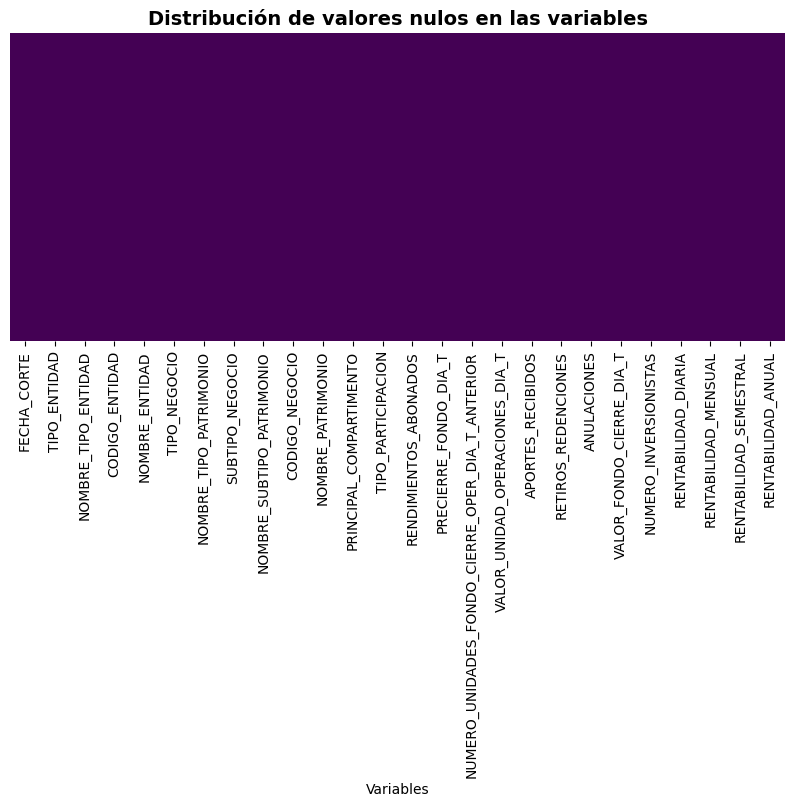

In [4]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Distribución de valores nulos en las variables",
          fontsize=14, fontweight="bold")
plt.xlabel("Variables")
plt.show()

Identificamos si hay datos faltantes en la base de datos para proceder a partir de ahí.

In [8]:
df.isna().sum()

,0
FECHA_CORTE,0
TIPO_ENTIDAD,0
NOMBRE_TIPO_ENTIDAD,0
CODIGO_ENTIDAD,0
NOMBRE_ENTIDAD,0
TIPO_NEGOCIO,0
NOMBRE_TIPO_PATRIMONIO,0
SUBTIPO_NEGOCIO,0
NOMBRE_SUBTIPO_PATRIMONIO,0
CODIGO_NEGOCIO,0


### **Infromación General**

```{important}
Al momento de graficar algunas variables se utilizó tranformación logarítmica en los datos, debido a que el gran rango de los mismos dificultaba la visualización de los mismos.
```

In [9]:
df.describe()

,TIPO_ENTIDAD,CODIGO_ENTIDAD,TIPO_NEGOCIO,SUBTIPO_NEGOCIO,CODIGO_NEGOCIO,PRINCIPAL_COMPARTIMENTO,TIPO_PARTICIPACION,RENDIMIENTOS_ABONADOS,PRECIERRE_FONDO_DIA_T,NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
count,1.300007e+06,1.300007e+06,1300007.0,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06
mean,3.442933e+01,2.710196e+01,9.0,2.770966e+00,5.027881e+04,1.199993e+00,6.500195e+02,1.890310e+07,1.611441e+11,6.598879e+11,1.157358e+05,3.088307e+09,3.037605e+09,-2.286747e+07,1.611709e+11,5.209843e+03,3.180150e+26,2.096465e+26,4.633448e+16,7.713861e+07
std,3.865099e+01,1.885390e+01,0.0,2.673459e+00,2.554373e+04,3.999947e-01,1.497363e+02,2.155705e+09,6.371159e+11,5.204966e+13,3.362218e+06,2.243997e+10,2.217504e+10,1.728039e+09,6.371320e+11,2.499272e+06,1.035133e+29,2.737937e+28,5.282958e+19,8.770580e+10
min,5.000000e+00,3.000000e+00,9.0,1.000000e+00,2.713000e+03,1.000000e+00,5.000000e+00,-7.100906e+11,-5.865346e+10,0.000000e+00,0.000000e+00,-1.997390e-01,-1.249060e+07,-6.499977e+11,-5.642586e+10,0.000000e+00,-1.080231e+14,-1.113881e+04,-2.475177e+02,-1.534884e+02
25%,5.000000e+00,1.600000e+01,9.0,1.000000e+00,2.574300e+04,1.000000e+00,5.040000e+02,-1.622053e+04,4.669345e+09,3.663416e+05,9.997565e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.676455e+09,3.000000e+00,-1.652880e-01,-3.054225e-01,0.000000e+00,0.000000e+00
50%,5.000000e+00,2.100000e+01,9.0,1.000000e+00,5.892100e+04,1.000000e+00,7.020000e+02,7.118279e+05,2.507828e+10,1.808714e+06,1.201734e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.508887e+10,2.200000e+01,2.646109e+00,3.810992e+00,3.957519e+00,3.763481e+00
75%,8.500000e+01,3.100000e+01,9.0,7.000000e+00,6.740300e+04,1.000000e+00,8.000000e+02,1.039454e+07,1.014578e+11,7.891836e+06,1.668354e+04,1.211798e+06,4.454755e+06,0.000000e+00,1.014693e+11,2.360000e+02,6.653085e+00,7.502263e+00,7.285516e+00,6.718203e+00
max,8.700000e+01,9.700000e+01,9.0,7.000000e+00,1.033280e+05,2.000000e+00,8.180000e+02,5.183557e+11,1.589805e+13,7.590329e+15,7.322737e+08,1.013510e+13,1.013500e+13,4.572483e+11,1.589993e+13,2.849427e+09,5.878116e+31,6.435146e+30,6.023515e+22,1.000000e+14


In [10]:
df.describe(include='object')

,FECHA_CORTE,NOMBRE_TIPO_ENTIDAD,NOMBRE_ENTIDAD,NOMBRE_TIPO_PATRIMONIO,NOMBRE_SUBTIPO_PATRIMONIO,NOMBRE_PATRIMONIO
count,1300007,1300007,1300007,1300007,1300007,1300007
unique,2192,3,46,1,5,660
top,2021-12-30,SF-SOCIEDAD FIDUCIARIA,Alianza Fiduciaria S.A.,FONDOS DE INVERSIÓN COLECTIVA,FIC DE TIPO GENERAL,FONDO ABIERTO ALIANZA
freq,808,822895,203419,1300007,869357,25206


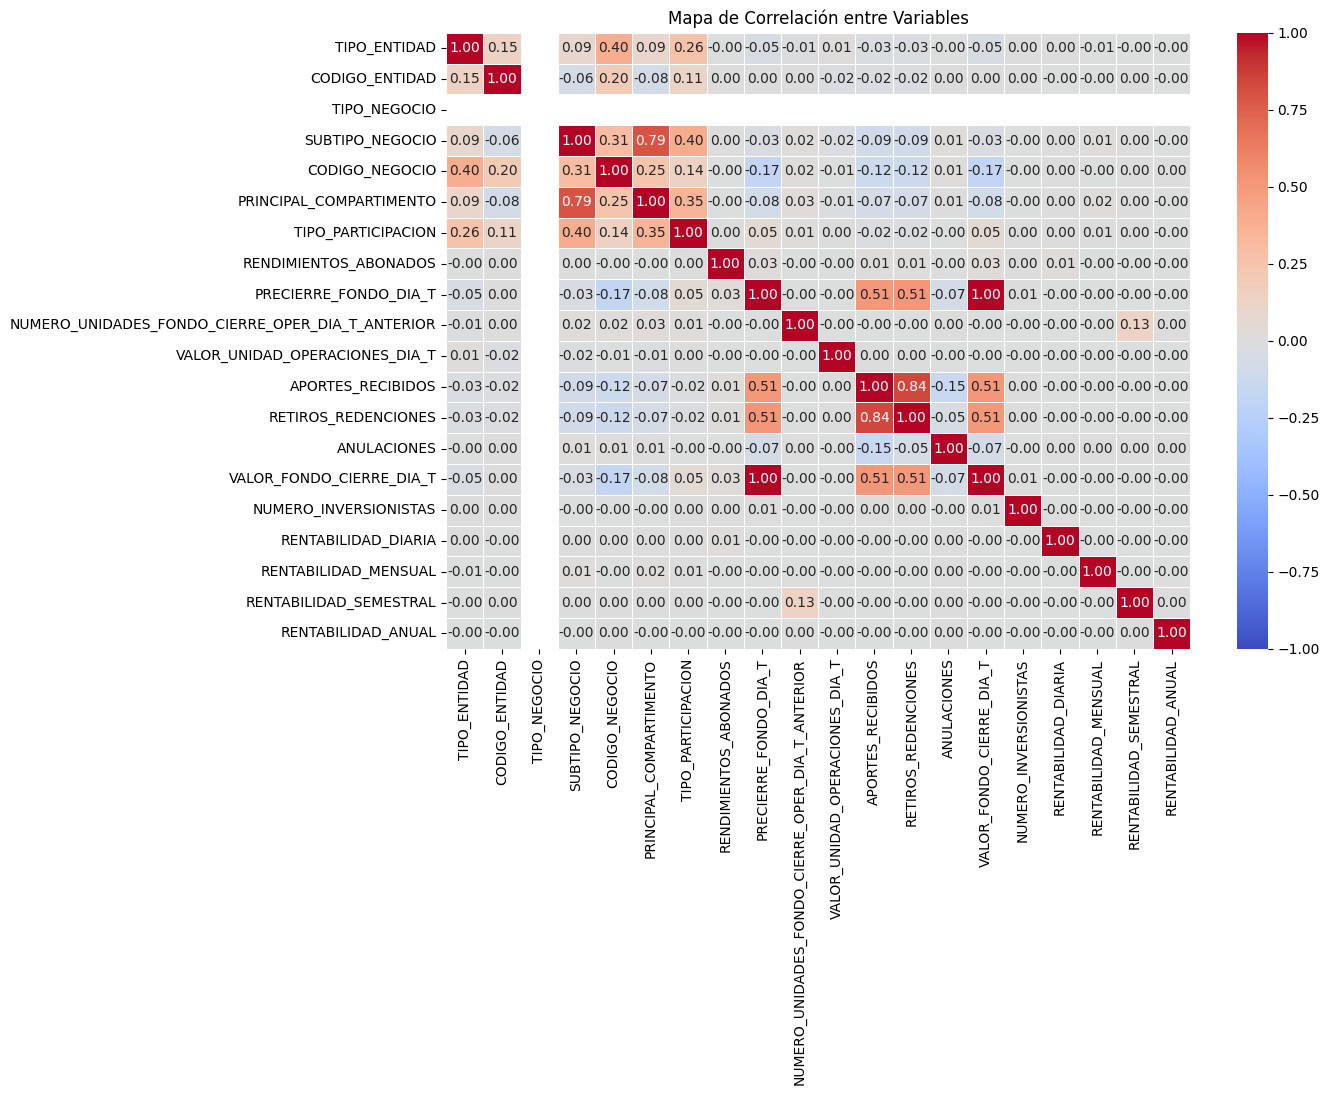

In [11]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=["float64", "int64"])

# Calcular la matriz de correlación
corr = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Título y visualización
plt.title("Mapa de Correlación entre Variables")
plt.show()

En base al mapa de correlación, eliminamos aquellas variables que no aportarian mucho para el modelo de regresión.

In [12]:
columns_to_drop = ['CODIGO_ENTIDAD','NOMBRE_ENTIDAD', 'NOMBRE_TIPO_PATRIMONIO','NOMBRE_PATRIMONIO','TIPO_PARTICIPACION', 'CODIGO_NEGOCIO', 'TIPO_NEGOCIO', 'ANULACIONES','NUMERO_INVERSIONISTAS','NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR','VALOR_UNIDAD_OPERACIONES_DIA_T']

df = df.drop(columns=columns_to_drop, errors='ignore')

print(df.head())


  FECHA_CORTE  TIPO_ENTIDAD                NOMBRE_TIPO_ENTIDAD  \
0  2016-01-01             5             SF-SOCIEDAD FIDUCIARIA   
1  2016-01-01             5             SF-SOCIEDAD FIDUCIARIA   
2  2016-01-01            85  COMISIONISTAS DE BOLSA DE VALORES   
3  2016-01-01            85  COMISIONISTAS DE BOLSA DE VALORES   
4  2016-01-01            85  COMISIONISTAS DE BOLSA DE VALORES   

   SUBTIPO_NEGOCIO  NOMBRE_SUBTIPO_PATRIMONIO  PRINCIPAL_COMPARTIMENTO  \
0                1        FIC DE TIPO GENERAL                        1   
1                7  FONDOS DE CAPITAL PRIVADO                        1   
2                1        FIC DE TIPO GENERAL                        1   
3                7  FONDOS DE CAPITAL PRIVADO                        2   
4                1        FIC DE TIPO GENERAL                        1   

   RENDIMIENTOS_ABONADOS  PRECIERRE_FONDO_DIA_T  APORTES_RECIBIDOS  \
0           1.225369e+08           9.303540e+11                0.0   
1           2.6780

De esta manera, en vez de trabajar con las 26 variables de la base de datos estamos trabajando con 15.

## **Análisis Variables**

```{note}
En algunas gráficas se utlizó la escala en el eje $y$ (o $x$) para mejorar la visualización de los datos.
```

### **Tipo de Entidad** (`TIPO_ENTIDAD`)




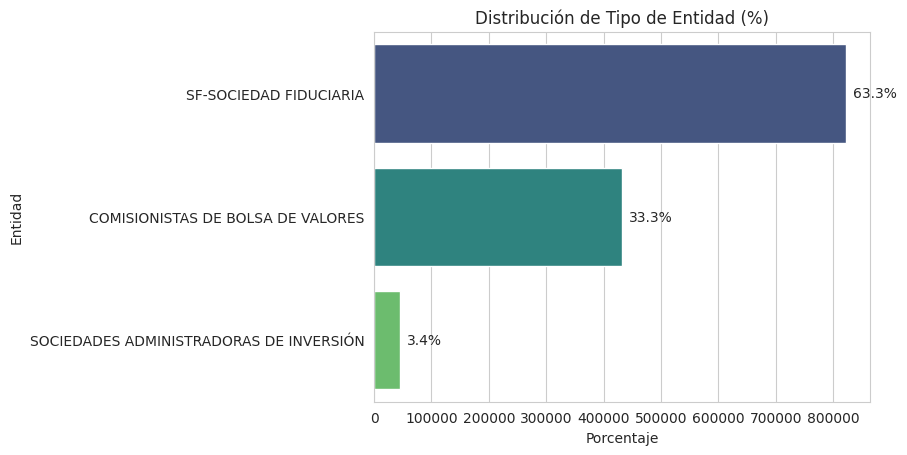

In [25]:
sns.set_style("whitegrid")

# Contar las frecuencias y calcular los porcentajes
total = len(df)
ax = sns.countplot(y=df["NOMBRE_TIPO_ENTIDAD"], order=df["NOMBRE_TIPO_ENTIDAD"].value_counts().index, palette="viridis")

# Agregar etiquetas con porcentajes automáticamente
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{(x/total)*100:.1f}%", fontsize=10, padding=5)

# Personalización
plt.title("Distribución de Tipo de Entidad (%)")
plt.xlabel("Porcentaje")
plt.ylabel("Entidad")

plt.show()


Vemos que la mayoria se encuentra en las sociedades fiduciarias (63.3%), seguidas por las comisionistas de bolsa de valores (33.3%), mientras que las sociedades administradoras de inversión tienen una participación mínima (3.4%).

### **Principal Compartimento** (`PRINCIPAL_COMPARTIMENTO`)



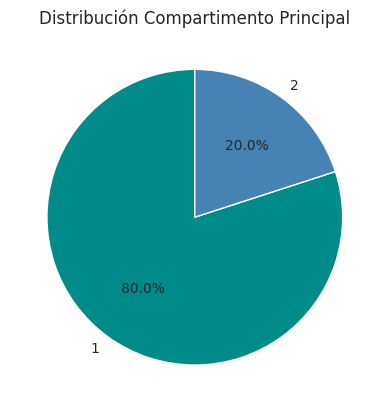

,proportion
PRINCIPAL_COMPARTIMENTO,
1,80.000723
2,19.999277


In [14]:
sex_count = df["PRINCIPAL_COMPARTIMENTO"].value_counts()
plt.pie(sex_count, labels = sex_count.index, autopct="%1.1f%%", startangle=90, colors = ["darkcyan", "steelblue"] )
plt.title("Distribución Compartimento Principal")
plt.show()
df["PRINCIPAL_COMPARTIMENTO"].value_counts()
df["PRINCIPAL_COMPARTIMENTO"].value_counts(normalize=True) * 100

Esto nos muestra que el 80% de los fondos no tienen compartimentos (valor 1, única unidad), mientras que el 20% sí están divididos en compartimentos (valor 2).

### **Rendimientos Abonados** (`RENDIMIENTOS_ABONADOS`)

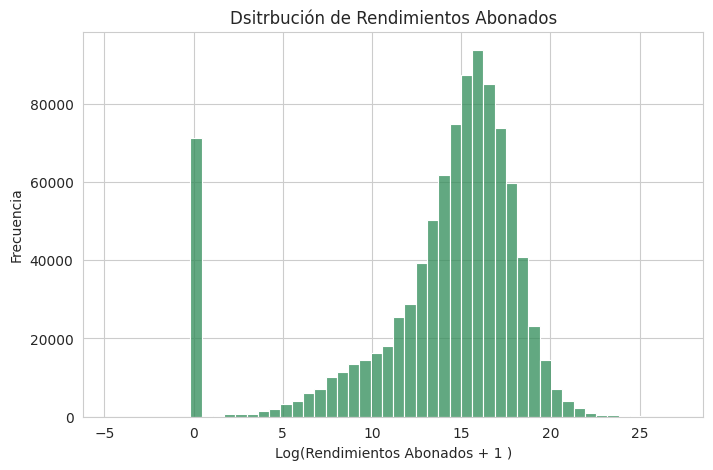

In [15]:
df["log_rendi"] = np.log1p(df["RENDIMIENTOS_ABONADOS"])

plt.figure(figsize=(8, 5))
sns.histplot(df["log_rendi"].dropna(), bins=50, color="seagreen")
plt.xlabel("Log(Rendimientos Abonados + 1 )")
plt.ylabel("Frecuencia")
plt.title("Dsitrbución de Rendimientos Abonados")
plt.show()

Aqui se muestra la distribución de los rendimientos abonados aplicando una transformación logarítmica.

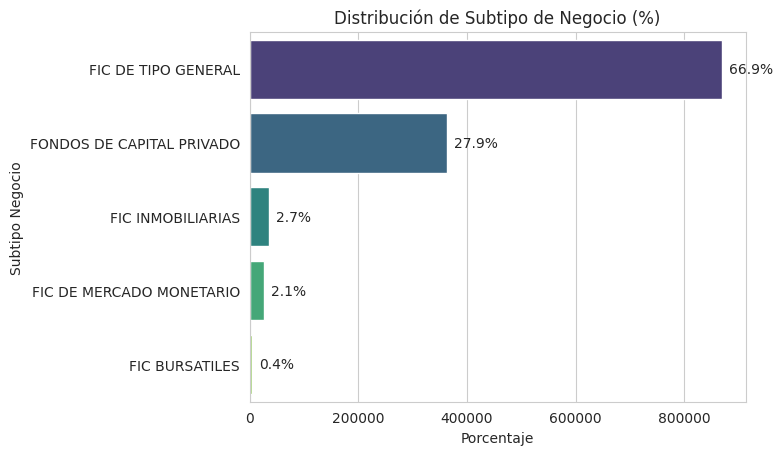

In [26]:
sns.set_style("whitegrid")

# Contar las frecuencias y calcular los porcentajes
total = len(df)
ax = sns.countplot(y=df["NOMBRE_SUBTIPO_PATRIMONIO"], order=df["NOMBRE_SUBTIPO_PATRIMONIO"].value_counts().index, palette="viridis")

# Agregar etiquetas con porcentajes automáticamente
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{(x/total)*100:.1f}%", fontsize=10, padding=5)

# Personalización
plt.title("Distribución de Subtipo de Negocio (%)")
plt.xlabel("Porcentaje")
plt.ylabel("Subtipo Negocio")

plt.show()

El gráfico muestra que la mayoría de los fondos pertenecen al subtipo "FIC de Tipo General" (66.9%), seguido por "Fondos de Capital Privado" (27.9%), mientras que los demás subtipos tienen una representación muy baja.

### **Distribución de Rentalidades (*Diaria, Mensual, Semestral, Anual*)**

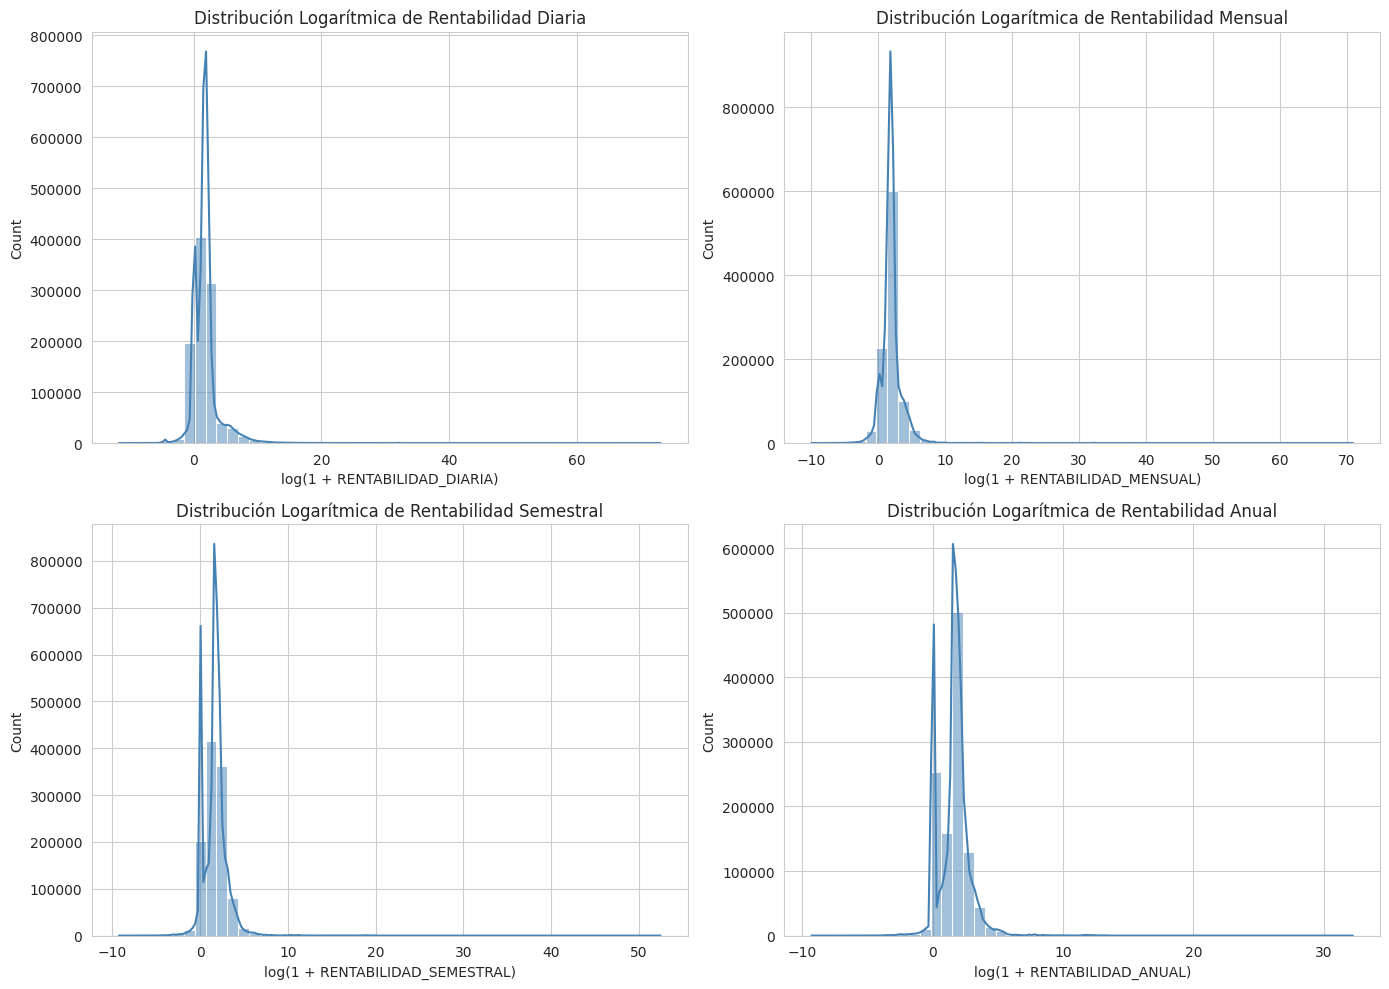

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Columnas y títulos
cols = ["RENTABILIDAD_DIARIA", "RENTABILIDAD_MENSUAL", "RENTABILIDAD_SEMESTRAL", "RENTABILIDAD_ANUAL"]
titles = ["Diaria", "Mensual", "Semestral", "Anual"]

# Crear histogramas con transformación logarítmica
for i, ax in enumerate(axes.flatten()):
    sns.histplot(np.log1p(df[cols[i]]), bins=50, kde=True, ax=ax, color="steelblue")
    ax.set_title(f"Distribución Logarítmica de Rentabilidad {titles[i]}")
    ax.set_xlabel(f"log(1 + {cols[i]})")  # Etiqueta del eje X con la transformación aplicada

# Ajustar diseño
plt.tight_layout()
plt.show()

 Se observa que en todos los casos la distribución está fuertemente sesgada a la derecha, con una gran concentración de valores cerca de cero y algunos valores extremos.

```{note}
En algunas gráficas se utlizó la escala en el eje $y$ (o $x$) para mejorar la visualización de los datos.
```

### **Total de Retiros y Redenciones por Tipo de Entidad**

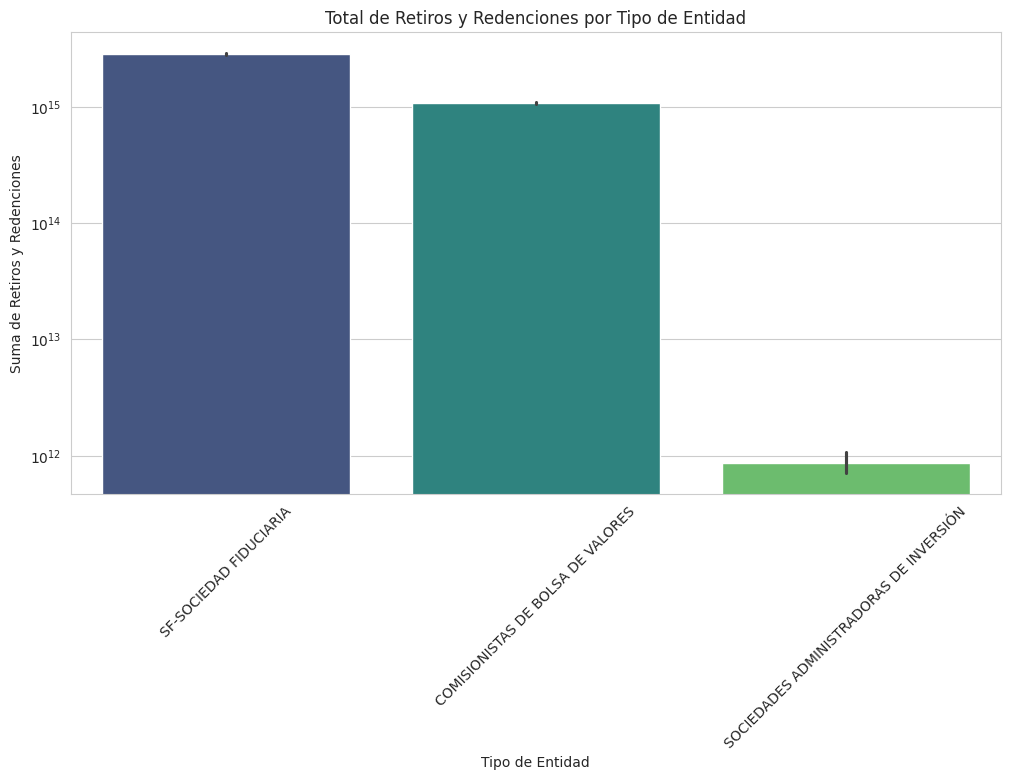

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="NOMBRE_TIPO_ENTIDAD", y="RETIROS_REDENCIONES", estimator=sum, palette="viridis")
plt.title("Total de Retiros y Redenciones por Tipo de Entidad")
plt.xlabel("Tipo de Entidad")
plt.ylabel("Suma de Retiros y Redenciones")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()


El gráfico muestra que las Sociedades Fiduciarias y las Comisionistas de Bolsa de Valores tienen los montos más altos de retiros y redenciones, mientras que las Sociedades Administradoras de Inversión presentan valores significativamente menores. El uso de escala logarítmica permite visualizar mejor las diferencias entre las categorías.

### **Aportes Recibidos por Tipo de Entidad**

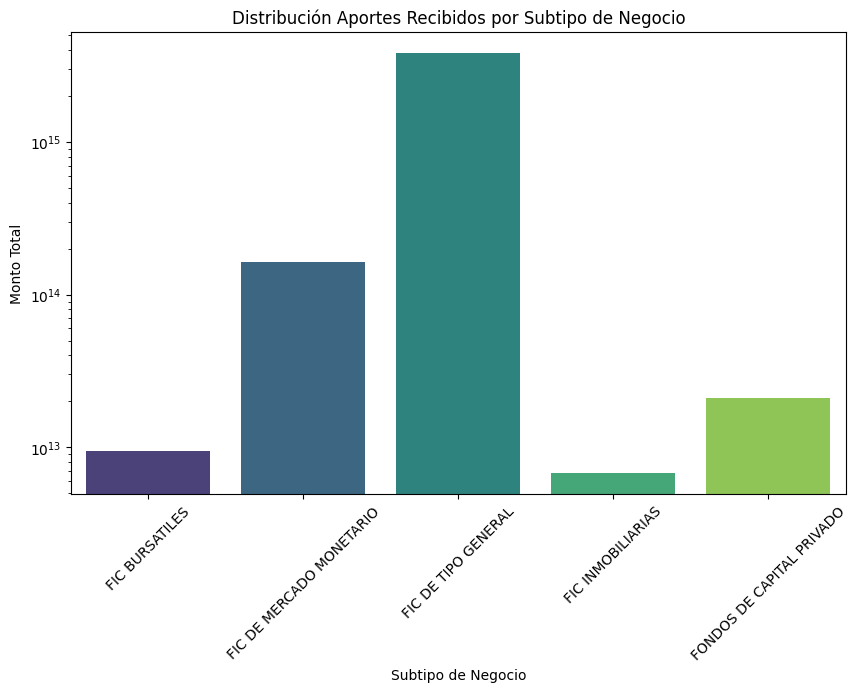

In [6]:

# Agrupar por subtipo de negocio y calcular la suma de aportaciones y retiros
df_grouped = df.groupby("NOMBRE_SUBTIPO_PATRIMONIO")["APORTES_RECIBIDOS"].sum().reset_index()

# Transformar los datos para que seaborn lo entienda mejor
df_melted = df_grouped.melt(id_vars="NOMBRE_SUBTIPO_PATRIMONIO", value_name="Monto")

# Crear el gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x="NOMBRE_SUBTIPO_PATRIMONIO", y="Monto", palette='viridis')
plt.yscale("log")


# Personalización
plt.xlabel("Subtipo de Negocio")
plt.ylabel("Monto Total")
plt.title("Distribución Aportes Recibidos por Subtipo de Negocio")
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()


El gráfico muestra claramente la distribución de los aportes recibidos por cada subtipo de negocio donde el uso de una escala logarítmica en el eje y resalta la diferencia en los montos entre los diferentes subtipos de negocio.

### **Relación entre Valor total del fondo al cierre del día T y Precio de cierre del fondo en el día T**

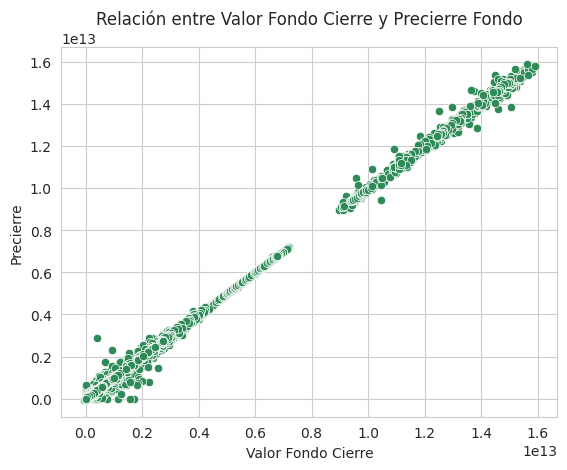

In [21]:
sns.scatterplot(data=df, x="VALOR_FONDO_CIERRE_DIA_T", y="PRECIERRE_FONDO_DIA_T", color='seagreen')

plt.xlabel("Valor Fondo Cierre")
plt.ylabel("Precierre")
plt.title("Relación entre Valor Fondo Cierre y Precierre Fondo")
plt.show()

El gráfico de dispersión muestra una relación lineal perfecta entre el Valor Fondo Cierre y el Preciere Fondo, ya que el coeficiente de relación es 1. Esto indica que los valores en ambos ejes siguen exactamente la misma tendencia sin desviaciones.

### **Retiros y Redenciones por Mes**

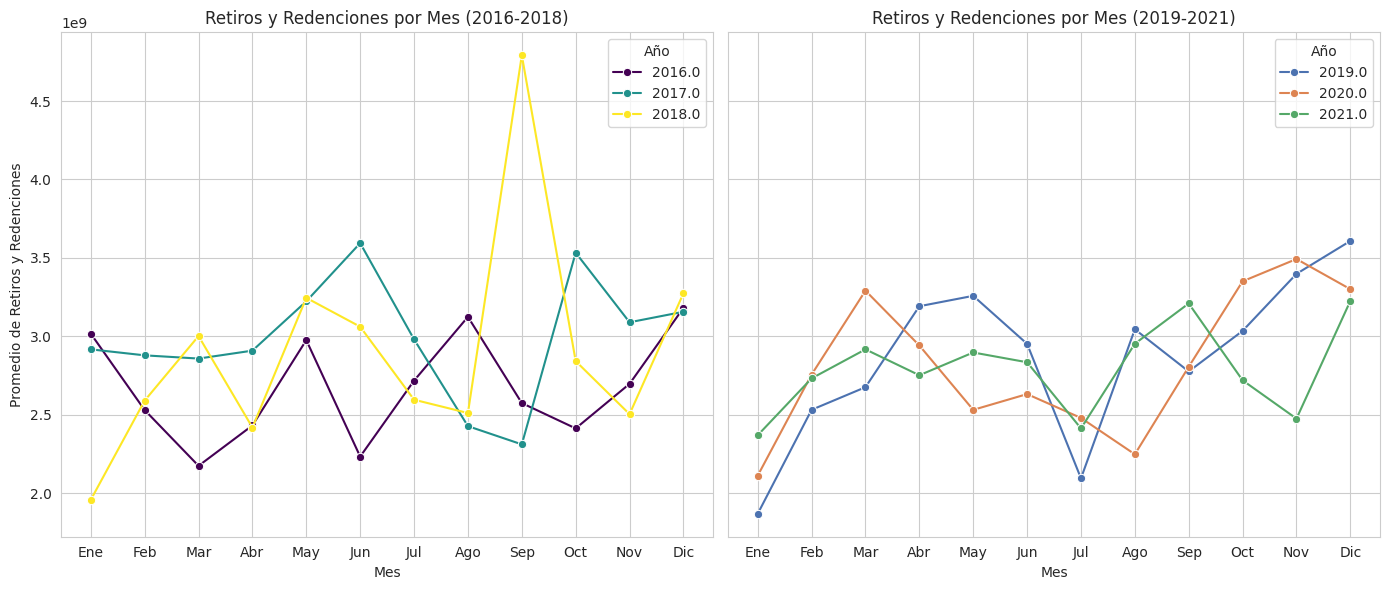

In [22]:

# Convertir fecha a datetime
df["FECHA_CORTE"] = pd.to_datetime(df["FECHA_CORTE"], dayfirst=True, errors='coerce')

# Crear columnas de Año y Mes
df["AÑO"] = df["FECHA_CORTE"].dt.year
df["MES"] = df["FECHA_CORTE"].dt.month

# Agrupar por Año y Mes
df_grouped = df.groupby(["AÑO", "MES"])["RETIROS_REDENCIONES"].mean().reset_index()

# Separar en dos grupos de años
grupo1 = df_grouped[df_grouped["AÑO"].between(2016, 2018)]
grupo2 = df_grouped[df_grouped["AÑO"].between(2019, 2021)]

# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico 1 (2016-2020)
sns.lineplot(
    data=grupo1, x="MES", y="RETIROS_REDENCIONES", hue="AÑO", marker="o", palette="viridis", ax=axes[0]
)
axes[0].set_title("Retiros y Redenciones por Mes (2016-2018)")
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Promedio de Retiros y Redenciones")
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
axes[0].legend(title="Año")

# Gráfico 2 (2021-2025)
sns.lineplot(
    data=grupo2, x="MES", y="RETIROS_REDENCIONES", hue="AÑO", marker="o", palette="deep", ax=axes[1]
)
axes[1].set_title("Retiros y Redenciones por Mes (2019-2021)")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("")
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
axes[1].legend(title="Año")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


Se observan variaciones en los patrones entre ambos períodos, con algunas fluctuaciones notables en ciertos meses.

## **Variables para el Modelo**

En el sector financiero, comprender los factores que influyen en los retiros y redenciones de los fondos de inversión es clave para la gestión de riesgos y la toma de decisiones estratégicas. La pregunta central que buscamos responder es:

¿Cuáles son las principales variables que impactan el monto de retiros y redenciones en los fondos de inversión?

Para ello, analizamos el comportamiento de la variable respuesta (`RETIROS_REDENCIONES`), en función de un conjunto de variables predictoras que podrían influir en su variabilidad.

* `APORTES_RECIBIDOS` (cantidad de dinero ingresado)
* `PRECIERRE_FONDO_DIA_T` (precio de cierre de la unidad del fondo)
* `VALOR_FONDO_CIERRE_DIA_T` (valor total del fondo)
* `TIPO_ENTIDAD` (tipo de entidad financiera)

